In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [215]:
# using custom equations

(is_ado, is_adult) = (False, False)
is_2nd, is_3rd = (False, False)
todd_male = 89 * 10.9 + 68
todd_female = 89 * 10.6 + 68
child_male = (88.5 - 61.9 * 7 + 1.1 * (26.7 * 22.9 + 903 * 1.219) + 20) * .985
child_female = (135.3 - 30.8 * 7 + 1.1 * (10 * 22.4 + 934 * 1.211) + 20) * .985
ado_male = (88.5 - 61.9 * 14.5 + 1.2 * (26.7 * 50.8 + 903 * 1.638) + 25) * .985
ado_female = (135.3 - (30.8 * 14.5) + 1.2 * (10.0 * 50) + (934 * 1.59) + 25) * .985
adult_male = (662 - (9.53 * 40) + 1.5 * (15.91 * 76.6) + (539.6 * 1.71)) * .985
adult_female = (354 - (6.91 * 40) + 1.5 * (9.36 * 57.6) + (726 * 1.59)) * .985
pregnant_female = ((ado_female*is_ado + adult_female*is_adult) * (340*is_2nd + 452*is_3rd)) * .985
child_male, child_female

(1535.2266145, 1408.8271790000003)

In [216]:
# using fao equations

todd_male = 59.512*10.8 - 30.4
todd_female = 58.317*10.6 - 31.1
child_male = (22.706*22.9 + 504.3) * .985 * 1.53
child_female = (20.315*22.4 + 485.9) * .985 * 1.53
ado_male = (17.686*50.8 + 658.2) * .985 * 1.53
ado_female = (13.384*50 + 692.6) * .985 * 1.53
adult_male = (12.75*76.6 + 717.8) * .985 * 1.53
adult_female = (10.675 * 57.6 + 663.566) * .985 * 1.53

todd_male, todd_female

(612.3296, 587.0602)

In [217]:
# using FAO data

perc_fish = .015

todd_male = 994 * (1-perc_fish)
todd_female = 916.5 * (1-perc_fish)
child_male = 1584 * (1-perc_fish)     # http://www.fao.org/3/y5686e/y5686e06.htm
child_female = 1450.2 * (1-perc_fish) # http://www.fao.org/3/y5686e/y5686e06.htm
ado_male = 2743 * (1-perc_fish)     # http://www.fao.org/3/y5686e/y5686e06.htm
ado_female = 2290 * (1-perc_fish)   # http://www.fao.org/3/y5686e/y5686e06.htm
adult_male = 2501 * (1-perc_fish) # http://www.fao.org/3/y5686e/y5686e09.htm
adult_female = 2016 * (1-perc_fish) # http://www.fao.org/3/y5686e/y5686e09.htm

todd_male, todd_female

(979.09, 902.7524999999999)

In [218]:
male_file = 'WPP_pop_age_MALE.csv'
female_file = 'WPP_pop_age_FEMALE.csv'
df_female = pd.read_csv(female_file, encoding = "ISO-8859-1")\
        .rename(columns={'Reference date (as of 1 July)':'year', 'Region, subregion, country or area *':'region'})
df_male = pd.read_csv(male_file, encoding = "ISO-8859-1")\
        .rename(columns={'Reference date (as of 1 July)':'year', 'Region, subregion, country or area *':'region'})

In [219]:
df_female.columns = ['Index', 'Variant', 'region', 'Notes', 'Country code', 'Type', 'Parent code', 'year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

In [220]:

def get_pop(X, demographic='toddler',country='WORLD', year=2050):
    pop = 0
    
    if demographic=='toddler':
        pop = int(re.sub('[^0-9]','', X[(X['year']==year) & (X['region']==country)]['0-4'].values[0]))
    if demographic=='child':
        pop = int(re.sub('[^0-9]','', X[(X['year']==year) & (X['region']==country)]['5-9'].values[0]))
    if demographic=='ado':
        pop = int(re.sub('[^0-9]','', X[(X['year']==year) & (X['region']==country)]['10-14'].values[0])) + int(re.sub('[^0-9]','', X[(X['year']==year) & (X['region']==country)]['15-19'].values[0]))
    if demographic=='adult':
        for col in X.columns[12:]:
                  pop += int(re.sub('[^0-9]','', X[(X['year']==year) & (X['region']==country)][col].values[0]))
                
                
                
    return pop * 1000

In [221]:
all_countries = [
    
    'Argentina', 'Australia', 'Bulgaria',
    'Belize', 'Brazil', 'Canada', 'Denmark',
    'France', 'Hungary', 'Kazakhstan',
    'Lithuania', 'Latvia', 'Paraguay',
    'Ukraine', 'Uruguay', 'United States of America',
    'Belarus', 'Botswana', 'Estonia',
    'Finland', 'Georgia', 'Iran', 'Libya',
    'Lesotho', 'Moldova', 'Mongolia',
    'Norway', 'New Zealand', 'Poland',
    'Portugal', 'Russia', 'Swaziland',
    'Tunisia',
    'United Arab Emirates', 'Belgium',
    'Brunei', 'Cyprus', 'Djibouti', 'Algeria',
    'Gambia', 'Iraq', 'Israel', 'Jordan',
    'Japan', 'South Korea', 'Kuwait',
    'Lebanon', 'Montenegro',
    'Mauritania', 'Netherlands', 'Saudi Arabia', 'Singapore', 'Trinidad and Tobago', 'Yemen',
    'Afghanistan', 'Angola', 'Burundi',
    'Bangladesh', 'Cameroon',
    'Democratic Republic of the Congo',
    'Republic of Congo', 'Dominican Republic', 'Egypt', 'Eritrea', 'Ethiopia',
    'Ghana', 'Guinea Bissau',
    'Guatemala', 'Haiti', 'India', 'Jamaica',
    'Kenya', 'Sri Lanka', 'Madagascar',
    'Mozambique', 'Malawi', 'Niger',
    'Nigeria', 'Nepal', 'Oman', 'Pakistan',
    'Philippines', 'Puerto Rico', 'North Korea', 'Rwanda', 'El Salvador',
    'Syria', 'Togo', 'Uganda',
    'Benin', 'Burkina Faso', 'Bolivia',
    'China', 'Ivory Coast', 'Colombia',
    'Costa Rica', 'United Kingdom',
    'Guinea', 'Honduras', 'Indonesia',
    'Ireland', 'Luxembourg', 'Mexico',
    'Malaysia', 'Panama', 'Sudan',
    'Senegal', 'Sierra Leone', 'Tajikistan',
    'Tanzania', 'Uzbekistan', 'Vietnam',
    'Zambia', 'Gabon', 'Equatorial Guinea',
    'Morocco', 'Peru',
    'Albania', 'Austria', 'Azerbaijan',
    'Bosnia and Herzegovina', 'Chile',
    'Czech Republic', 'Germany', 'Spain',
    'Greece', 'Croatia', 'Italy',
    'Kyrgyzstan', 'Laos', 'Macedonia',
    'Mali', 'Nicaragua', 'Papua New Guinea', 'Romania', 'Somalia',
    'Serbia', 'Slovakia', 'Slovenia',
    'Chad', 'Thailand', 'Turkmenistan',
    'East Timor', 'Turkey', 'Venezuela',
    'Armenia', 'Bhutan', 'Central African Republic', 'Switzerland', 'Cuba',
    'Ecuador', 'Guyana', 'Cambodia',
    'Liberia', 'Myanmar', 'Namibia',
    'Suriname', 'Sweden', 'South Africa',
    'Zimbabwe'
]

countries_names = pd.read_csv('country_names.csv',encoding='latin-1').rename({'Country Code': 'ISO3'}, axis=1)
countries_names = countries_names.iloc[[e in all_countries for e in list(countries_names['name'].values)], :]
countries_names.loc[countries_names['nev_admin_name']=='Iran', 'fao_producer_prices_name'] = 'Iran (Islamic Republic of)'
countries_names.loc[countries_names['nev_admin_name']=='Swaziland', 'fao_producer_prices_name'] = 'Eswatini'
countries_names.loc[countries_names['nev_admin_name']=='Republic of Congo', 'fao_producer_prices_name'] = 'Congo'
countries_names.loc[countries_names['nev_admin_name']=="North Korea", 'fao_producer_prices_name'] = "Dem. People's Republic of Korea"
countries_names.loc[countries_names['nev_admin_name']=="Syria", 'fao_producer_prices_name'] = "Syrian Arab Republic"
countries_names.loc[countries_names['nev_admin_name']=="Ivory Coast", 'fao_producer_prices_name'] = "Cote d'Ivoire"
countries_names.loc[countries_names['nev_admin_name']=="Ivory Coast", 'nev_admin_name'] = "C√¥te d'Ivoire"
countries_names.loc[countries_names['nev_admin_name']=="Czech Republic", 'fao_producer_prices_name'] = "Czechia"
countries_names.loc[countries_names['nev_admin_name']=="Macedonia", 'fao_producer_prices_name'] = "North Macedonia"
countries_names.loc[countries_names['nev_admin_name']=="East Timor", 'fao_producer_prices_name'] = "Timor-Leste"

countries_names.head()

,id,ISO3,adm0_a3,name,nev_admin_name,fao_producer_prices_name,nev_name,nev_name_long,sovereignt,base_id,...,iana_internet,un_vehicle,ioc_olympic,un_iso_numeric,itu_calling,UNI,UNDP,FAOSTAT,GAU,FAOSTAT_augmented
1,2,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,1,...,.af,AFG,AFG,4.0,93,4.0,AFG,2.0,1.0,2
2,3,AGO,AGO,Angola,Angola,Angola,Angola,Angola,Angola,2,...,.ao,NaN,ANG,24.0,244,24.0,ANG,7.0,8.0,7
4,5,ALB,ALB,Albania,Albania,Albania,Albania,Albania,Albania,4,...,.al,AL,ALB,8.0,355,8.0,ALB,3.0,3.0,3
7,8,ARE,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,7,...,.ae,NaN,UAE,784.0,971,784.0,UAE,225.0,255.0,225
8,9,ARG,ARG,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,8,...,.ar,RA,ARG,32.0,54,32.0,ARG,9.0,12.0,9


In [222]:
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']
not_found = ['CYN', 'KOS', 'PSX', 'SDS', 'SOL', 'TWN']

for country in countries:
    if country not in not_found:
        try:
            print(country)
            new_name = countries_names[countries_names['ISO3']==country].name.values[0]
            print(new_name)
            print(get_pop(df_female, country=new_name))
        except:
            new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
            print(new_name)
            print(get_pop(df_female, country=new_name))


AFG
Afghanistan
2746000
AGO
Angola
5338000
ALB
Albania
46000
ARE
United Arab Emirates
266000
ARG
Argentina
1691000
ARM
Armenia
74000
AUS
Australia
892000
AUT
Austria
199000
AZE
Azerbaijan
287000
BDI
Burundi
1573000
BEL
Belgium
302000
BEN
Benin
1456000
BFA
Burkina Faso
2623000
BGD
Bangladesh
5019000
BGR
Bulgaria
120000
BIH
Bosnia and Herzegovina
48000
BLR
Belarus
230000
BLZ
Belize
18000
BOL
Bolivia
Bolivia (Plurinational State of)
555000
BRA
Brazil
5197000
BRN
Brunei
Brunei Darussalam
12000
BTN
Bhutan
21000
BWA
Botswana
134000
CAF
Central African Republic
451000
CAN
Canada
1083000
CHE
Switzerland
226000
CHL
Chile
465000
CHN
China
31222000
CIV
Ivory Coast
Cote d'Ivoire
3117000
CMR
Cameroon
2915000
COD
Democratic Republic of the Congo
12139000
COG
Republic of Congo
Congo
635000
COL
Colombia
1329000
CRI
Costa Rica
131000
CUB
Cuba
199000
CYP
Cyprus
27000
CZE
Czech Republic
Czechia
256000
DEU
Germany
1756000
DJI
Djibouti
43000
DNK
Denmark
157000
DOM
Dominican Republic
383000
DZA
Algeria
2213

In [223]:
# !pip3 install geopandas
import geopandas as gpd
import_indep = gpd.read_file('shp_trade_dep.gpkg')
imports_data = import_indep[['cntry', 'admin','country','yr2013']]
imports_data.head()

,cntry,admin,country,yr2013
0,None,Saint Barthelemy,None,NaN
1,None,Jersey,None,NaN
2,None,Ashmore and Cartier Islands,None,NaN
3,None,Siachen Glacier,None,NaN
4,None,Indian Ocean Territories,None,NaN


In [224]:
# merge import with country_names to add ISO3 columns

imports = imports_data.merge(countries_names[['ISO3', 'name']], left_on='admin', right_on='name', how='right')
imports.head()

,cntry,admin,country,yr2013,ISO3,name
0,Armenia,Armenia,Armenia,0.124763,ARM,Armenia
1,Australia,Australia,Australia,1.000000,AUS,Australia
2,India,India,India,0.493093,IND,India
3,Indonesia,Indonesia,Indonesia,0.806717,IDN,Indonesia
4,Iran (Islamic Republic of),Iran,Iran (Islamic Republic of),0.209009,IRN,Iran


In [225]:
diet_2000 = pd.read_csv('Consumption_2000_FAOSTAT.csv')
LS_2000_df = diet_2000[diet_2000['Item']=='Animal Products'][['Country','Value']].merge(countries_names[['name','ISO3']].drop_duplicates(), right_on='name',left_on='Country',how='left')
# kcal/capita/day to cal/capita
LS_2000_df['LS2000_percapita'] = LS_2000_df['Value'].apply(lambda x:x*1e3*365.25)
LS_2000_df.head()

,Country,Value,name,ISO3,LS2000_percapita
0,Afghanistan,275,Afghanistan,AFG,100443750.0
1,Albania,674,Albania,ALB,246178500.0
2,Algeria,277,Algeria,DZA,101174250.0
3,Angola,153,Angola,AGO,55883250.0
4,Antigua and Barbuda,701,NaN,NaN,256040250.0


In [226]:
data_path = 'outputs/compare/'
df = pd.read_csv(data_path+'ssp2_compare_new.csv')
df.head()

,pixel_id,%cropland_2000,%cropland_2050,cal_per_ha_pred,cal_per_ha_2000,delta_cal_per_ha,%delta_cal_per_ha,ha_per_pixel,population_2000,population_2050,calories_2000,calories_2050,delta_cal,%delta_cal,country_id,base_id,ISO3,name,sovereignt
0,330087,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
1,330088,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
2,330089,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
3,330090,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
4,334378,0.0,NaN,NaN,NaN,NaN,NaN,961.741882,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark


In [268]:
# function that returns the population from a dataframe by year
def get_population(X, year=2050):
    return int(X['population_'+str(year)].sum())

# function that returns the total production from a dataframe by year
def get_production(X, year=2050):
    return X['calories_'+str(year)].sum()

# function that calculates the caloric sufficiency. it is fed by a dataframe [to preserve generality]
def cal_suff_demo(X, cntry='WORLD', year=2050, food_waste=.19, diet=.19, feed_food_factor=2.3, population = None, pop_fact=1., ADER=2320*1e3*365.25):
    
    
    conso = 1-food_waste
    ratio = 1 + .52/.29
    perc_feed = conso / ratio
    perc_food = perc_feed * (ratio-1)
    
    prod = get_production(X, year=year)
    food = perc_food * prod
    feed_now_food = 0.
    if cntry in LS_2000_df.ISO3.unique():
        LS = LS_2000_df[LS_2000_df.ISO3==cntry]['LS2000_percapita'].values[0] * get_population(X, year=2000)
        
    else:
        LS = (1.1483e15*1e3)  * get_population(X, year=2000) / 5976296907.
    if year==2050:
        LS_2000 = LS
        LS = diet * (food + feed_food_factor * LS_2000) / (1 + diet * (feed_food_factor - 1))
        feed_now_food = feed_food_factor * (LS_2000 - LS)
    
    production = food + LS + feed_now_food
    demos = ['toddler', 'child', 'ado', 'adult']
    ader_male = [todd_male, child_male, ado_male, adult_male]
    ader_female = [todd_female, child_female, ado_female, adult_female]
    
    if cntry not in not_found:
        if cntry=='WORLD':
            demand_male = np.sum([get_pop(df_male, demographic=demo, year=year) * ader * 1e+3 * 365.25 for demo, ader in zip (demos, ader_male)])
            demand_female = np.sum([get_pop(df_female, demographic=demo, year=year) * ader * 1e+3 * 365.25 for demo, ader in zip (demos, ader_female)])
#             pop_male = np.sum([get_pop(df_male, demographic=demo, year=year) for demo in zip demos])
#             pop_female = np.sum([get_pop(df_female, demographic=demo, year=year) for demo in zip demos])
        else:    
            try:
                new_name = countries_names[countries_names['ISO3']==cntry].name.values[0]
                demand_male = np.sum([get_pop(df_male, country=new_name, demographic=demo, year=year) * ader * 1e+3 * 365.25 for demo, ader in zip (demos, ader_male)])
                demand_female = np.sum([get_pop(df_male, country=new_name, demographic=demo, year=year) * ader * 1e+3 * 365.25 for demo, ader in zip (demos, ader_female)])
                
            except:
                new_name = countries_names[countries_names['ISO3']==cntry].fao_producer_prices_name.values[0]
                demand_male = np.sum([get_pop(df_male, country=new_name, demographic=demo, year=year) * ader * 1e+3 * 365.25 for demo, ader in zip (demos, ader_male)])
                demand_female = np.sum([get_pop(df_female, country=new_name, demographic=demo, year=year) * ader * 1e+3 * 365.25 for demo, ader in zip (demos, ader_female)])
                
    
        return production/(demand_male+demand_female)
    else:
        return cal_suff(X, cntry=cntry, year=year, food_waste=food_waste, diet=diet, feed_food_factor=feed_food_factor, population = population, pop_fact=pop_fact)
cal_suff_demo(df, year=2050, diet=diets[1])

1.275683413556884

In [228]:
# function that calculates the caloric sufficiency. it is fed by a dataframe [to preserve generality]
def cal_suff(X, cntry=None, year=2050, food_waste=.19, diet=.19, feed_food_factor=2.3, population = None, pop_fact=1., ADER=2320*1e3*365.25):
    
    
    conso = 1-food_waste
    ratio = 1 + .52/.29
    perc_feed = conso / ratio
    perc_food = perc_feed * (ratio-1)
    
    prod = get_production(X, year=year)
    food = perc_food * prod
    feed_now_food = 0.
    if cntry in LS_2000_df.ISO3.unique():
        LS = LS_2000_df[LS_2000_df.ISO3==cntry]['LS2000_percapita'].values[0] * get_population(X, year=2000)
        
    else:
        LS = (1.1483e15*1e3)  * get_population(X, year=2000) / 5976296907.
    if year==2050:
        LS_2000 = LS
        LS = diet * (food + feed_food_factor * LS_2000) / (1 + diet * (feed_food_factor - 1))
        feed_now_food = feed_food_factor * (LS_2000 - LS)
    
    production = food + LS + feed_now_food
    if population:
        demand = population * ADER
    else:
        demand = get_population(X, year=year) * pop_fact * ADER
    
    return production/demand

cal_suff(df, year=2050, diet=diets[1])

1.3807627859654792

In [115]:
def custom_categorization_new(row):
    
    if row['calSuff2000'] > 3 and row['trade'] > 0.8: 
        return 'Exporters' # e.g Brazil, USA, France, Denmark (Greenland)
    
    elif (row['delta_CalSuff_avg'] > 0.6 and row['delta_consistency'] >= 3) or (row['calSuff2000'] > 1.2 and row['delta_consistency'] >= 3 and row['delta_CalSuff_avg'] > 0.2):
        return 'Increasing sufficiency'
    
    elif row['trade'] < 0.1:
        return 'Importers'
    
    elif row['calSuff2000'] < 1.2 and (row['delta_consistency'] <= 1 or row['highest_ssp'] < 0.9):
        return 'Most vulnerable'
    
    elif (row['lowest_ssp'] < 1 or row['calSuff2000'] < 2) and row['delta_CalSuff_avg'] < -0.2 and row['delta_consistency'] <= 1:
        return 'Newly vulnerable'
    
    elif row['calSuff2000'] < 1.2 and row['delta_consistency'] >= 2 and row['lowest_ssp'] > 0.9*row['calSuff2000']:
        return 'Vulnerable but improving'
    
    elif row['delta_consistency'] <= 2 and row['delta_CalSuff_avg'] < -0.1 and row['calSuff2000'] > 2:
        return 'Decreasing but not as vulnerable'
    
    elif row['delta_consistency'] > 0 and row['delta_consistency'] < 4:
        return 'Highly variable'  
    
    return 'Outliers'

In [147]:
import operator
header = [
    'Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']
suffices = []
all_counts = []

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050']].set_index('Scenario')

values = np.round(np.array([1., 1.05, 1.10, 1.15, 1.20]), 2)
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']
def expansion(x, y):
    if x==0:
        return 0
    else:
        return max(min(1., x+(y-1)),0)

for value in list(values):

    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    for country in list(countries):
        try:
            print(country)
            new_name = countries_names[countries_names['ISO3']==country].name.values[0]
            pop_medium_2000 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2000)]['PopTotal']['Medium']

        except:
            try:
                new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                pop_medium_2000 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2000)]['PopTotal']['Medium']
            except:
                pop_medium_2000 = get_population(df[df.ISO3==country], year=2000)
                
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000, population=pop_medium_2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')
    
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            df_dup = df_ssp[df_ssp['ISO3']==country].copy()
            
            try:
                print(country)
                new_name = countries_names[countries_names['ISO3']==country].name.values[0]
                pop_medium_2050 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2050)]['PopTotal']['Medium']

            except:
                try:
                    new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                    pop_medium_2050 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2050)]['PopTotal']['Medium']
                except:
                    pop_medium_2050 = get_population(df_dup, year=2050)
            try:
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            except:
                my_diet = diets[i]
                
            df_dup['%cropland_2050'] = df_dup['%cropland_2000'].apply(lambda x: expansion(x, value))

            df_dup.loc[:, 'calories_2050'] = df_dup['%cropland_2050'] * df_dup['cal_per_ha_pred'] * df_dup['ha_per_pixel']
            suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_dup, cntry=country, year=2050, diet=my_diet, population=pop_medium_2050)
    
        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')
    
    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    suffies.dropna(subset=['trade','ssp1','ssp2','ssp3','ssp4','ssp5'])  

    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05

    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    suffices.append(suffies)
    
    inters = pd.DataFrame(suffies.groupby('category')['ISO3'].apply(list))
    all_counts.append(inters)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category').reset_index()
    
    
    suffice['value'] = value
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

AFG
AGO
ALB
ARE
ARG
ARM
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BIH
BLR
BLZ
BOL
BRA
BRN
BTN
BWA
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG
COL
CRI
CUB
CYN
CYP
CZE
DEU
DJI
DNK
DOM
DZA
ECU
EGY
ERI
ESP
EST
ETH
FIN
FRA
GAB
GBR
GEO
GHA
GIN
GMB
GNB
GNQ
GRC
GTM
GUY
HND
HRV
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KOR
KOS
KWT
LAO
LBN
LBR
LBY
LKA
LSO
LTU
LUX
LVA
MAR
MDA
MDG
MEX
MKD
MLI
MMR
MNE
MNG
MOZ
MRT
MWI
MYS
NAM
NER
NGA
NIC
NLD
NOR
NPL
NZL
OMN
PAK
PAN
PER
PHL
PNG
POL
PRI
PRK
PRT
PRY
PSX
ROU
RUS
RWA
SAU
SDN
SDS
SEN
SGP
SLE
SLV
SOL
SOM
SRB
SUR
SVK
SVN
SWE
SWZ
SYR
TCD
TGO
THA
TJK
TKM
TLS
TTO
TUN
TUR
TWN
TZA
UGA
UKR
URY
USA
UZB
VEN
VNM
YEM
ZAF
ZMB
ZWE
AFG
AGO
ALB
ARE
ARG
ARM
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BIH
BLR
BLZ
BOL
BRA
BRN
BTN
BWA
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG
COL
CRI
CUB
CYN
CYP
CZE
DEU
DJI
DNK
DOM
DZA
ECU
EGY
ERI
ESP
EST
ETH
FIN
FRA
GAB
GBR
GEO
GHA
GIN
GMB
GNB
GNQ
GRC
GTM
GUY
HND
HRV
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KOR
KOS
KWT
LAO


GNB
GNQ
GRC
GTM
GUY
HND
HRV
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KOR
KOS
KWT
LAO
LBN
LBR
LBY
LKA
LSO
LTU
LUX
LVA
MAR
MDA
MDG
MEX
MKD
MLI
MMR
MNE
MNG
MOZ
MRT
MWI
MYS
NAM
NER
NGA
NIC
NLD
NOR
NPL
NZL
OMN
PAK
PAN
PER
PHL
PNG
POL
PRI
PRK
PRT
PRY
PSX
ROU
RUS
RWA
SAU
SDN
SDS
SEN
SGP
SLE
SLV
SOL
SOM
SRB
SUR
SVK
SVN
SWE
SWZ
SYR
TCD
TGO
THA
TJK
TKM
TLS
TTO
TUN
TUR
TWN
TZA
UGA
UKR
URY
USA
UZB
VEN
VNM
YEM
ZAF
ZMB
ZWE
AFG
AGO
ALB
ARE
ARG
ARM
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BIH
BLR
BLZ
BOL
BRA
BRN
BTN
BWA
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG
COL
CRI
CUB
CYN
CYP
CZE
DEU
DJI
DNK
DOM
DZA
ECU
EGY
ERI
ESP
EST
ETH
FIN
FRA
GAB
GBR
GEO
GHA
GIN
GMB
GNB
GNQ
GRC
GTM
GUY
HND
HRV
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KOR
KOS
KWT
LAO
LBN
LBR
LBY
LKA
LSO
LTU
LUX
LVA
MAR
MDA
MDG
MEX
MKD
MLI
MMR
MNE
MNG
MOZ
MRT
MWI
MYS
NAM
NER
NGA
NIC
NLD
NOR
NPL
NZL
OMN
PAK
PAN
PER
PHL
PNG
POL
PRI
PRK
PRT
PRY
PSX
ROU
RUS
RWA
SAU
SDN
SDS
SEN
SGP
SLE
SLV
SOL
SOM
SRB
SUR
SVK
SVN


PAK
PAN
PER
PHL
PNG
POL
PRI
PRK
PRT
PRY
PSX
ROU
RUS
RWA
SAU
SDN
SDS
SEN
SGP
SLE
SLV
SOL
SOM
SRB
SUR
SVK
SVN
SWE
SWZ
SYR
TCD
TGO
THA
TJK
TKM
TLS
TTO
TUN
TUR
TWN
TZA
UGA
UKR
URY
USA
UZB
VEN
VNM
YEM
ZAF
ZMB
ZWE
AFG
AGO
ALB
ARE
ARG
ARM
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BIH
BLR
BLZ
BOL
BRA
BRN
BTN
BWA
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG
COL
CRI
CUB
CYN
CYP
CZE
DEU
DJI
DNK
DOM
DZA
ECU
EGY
ERI
ESP
EST
ETH
FIN
FRA
GAB
GBR
GEO
GHA
GIN
GMB
GNB
GNQ
GRC
GTM
GUY
HND
HRV
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KOR
KOS
KWT
LAO
LBN
LBR
LBY
LKA
LSO
LTU
LUX
LVA
MAR
MDA
MDG
MEX
MKD
MLI
MMR
MNE
MNG
MOZ
MRT
MWI
MYS
NAM
NER
NGA
NIC
NLD
NOR
NPL
NZL
OMN
PAK
PAN
PER
PHL
PNG
POL
PRI
PRK
PRT
PRY
PSX
ROU
RUS
RWA
SAU
SDN
SDS
SEN
SGP
SLE
SLV
SOL
SOM
SRB
SUR
SVK
SVN
SWE
SWZ
SYR
TCD
TGO
THA
TJK
TKM
TLS
TTO
TUN
TUR
TWN
TZA
UGA
UKR
URY
USA
UZB
VEN
VNM
YEM
ZAF
ZMB
ZWE
AFG
AGO
ALB
ARE
ARG
ARM
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BIH
BLR
BLZ
BOL
BRA
BRN
BTN
BWA
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG


In [148]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16],
 [13, 22, 27, 37, 39],
 [23, 21, 21, 19, 19],
 [47, 43, 40, 39, 35],
 [30, 27, 25, 20, 18],
 [1, 4, 3, 4, 7],
 [23, 20, 16, 14, 14],
 [7, 7, 10, 11, 10],
 [0, 0, 2, 0, 2])

In [98]:
np.sum(([d>0 for d in diffs_2000]))/len(diffs_2000)

0.0125

In [140]:
from decimal import Decimal

cropland_2000 = (df['%cropland_2000'] * df['ha_per_pixel']).sum()

values = [.95, 1., 1.05, 1.15, 1.20]
rng = [  2.56E+09,
         2.89E+09,
         3.21E+09,
         3.52E+09,
         3.81E+09]

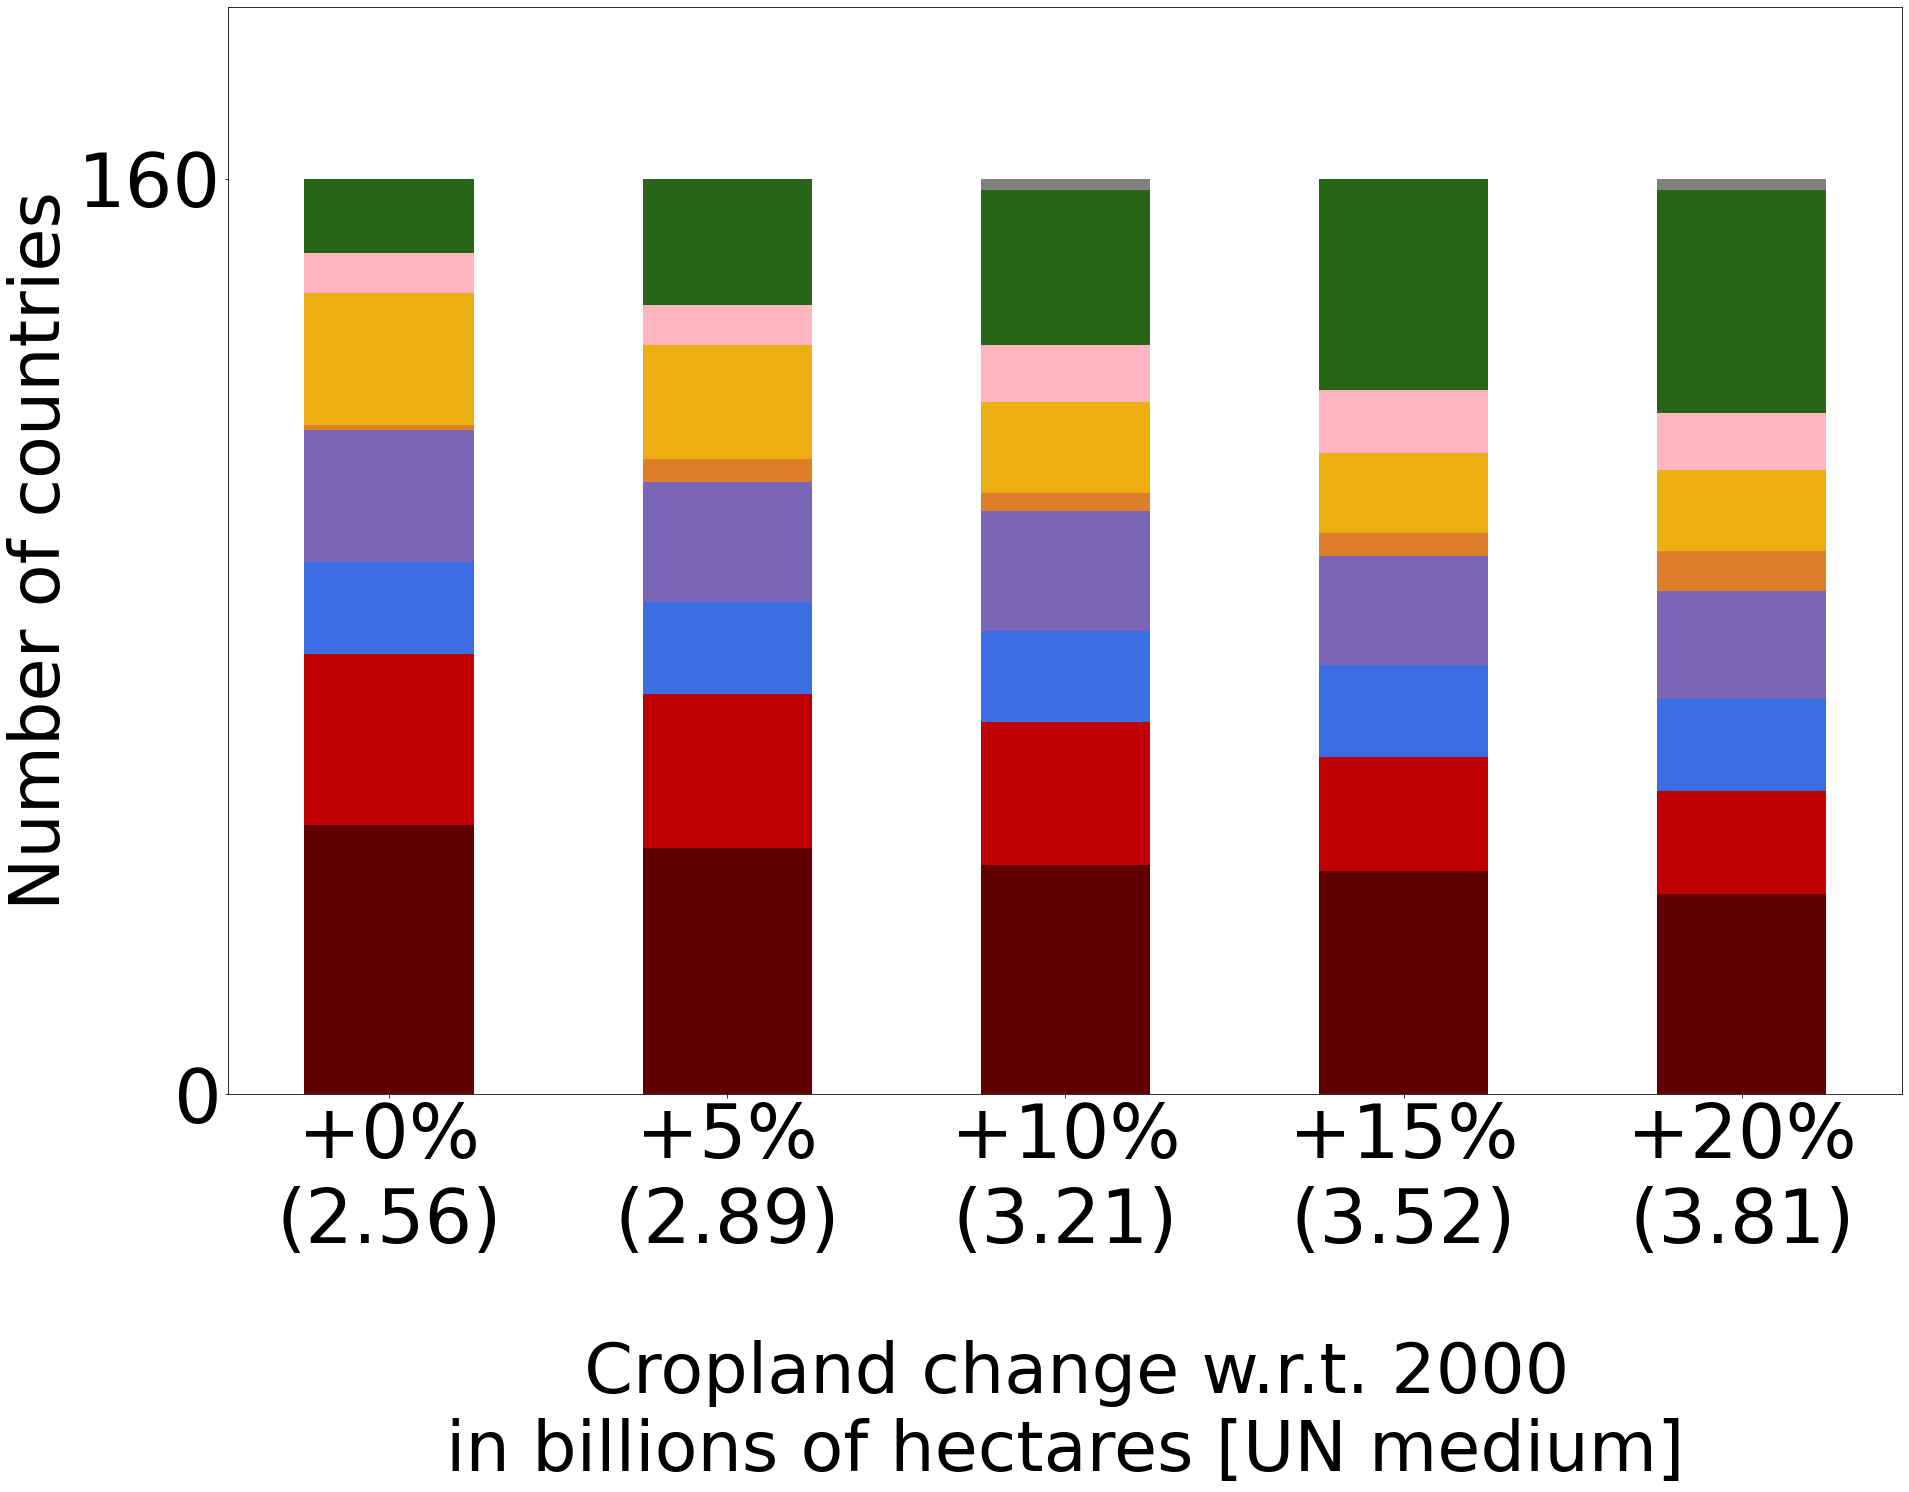

In [150]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
cropland_2000 = (df['%cropland_2000'] * df['ha_per_pixel']).sum()
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']



values = [e+'\n('+str(r/1e+09)+')' for e, r in zip(['+0%' , '+5%', '+10%', '+15%', '+20%'], rng)]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([13, 22, 27, 37, 39])
cat3 = np.array([23, 21, 21, 19, 19])
cat4 = np.array([47, 43, 40, 39, 35])
cat5 = np.array([30, 27, 25, 20, 18])
cat6 = np.array([1, 4, 3, 4, 7])
cat7 = np.array([23, 20, 16, 14, 14])
cat8 = np.array([7, 7, 10, 11, 10])
cat9 = np.array([0, 0, 2, 0, 2])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=75)
plt.xlabel('\n Cropland change w.r.t. 2000\nin billions of hectares [UN medium]', fontsize=70)
plt.ylim([0,190])
plt.yticks([0, 160],fontsize=75)
plt.ylabel('Number of countries', fontsize=70)

p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')


# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

In [202]:
cnty_pops = pd.read_csv('WPP2019_TotalPopulationBySex.csv')[['LocID', 'Location', 'Variant', 'Time','PopTotal']].set_index('Variant')

cnty_pops.loc[cnty_pops["Location"]=="C√¥te d'Ivoire", "Location"] = "Cote d'Ivoire"
cnty_pops = cnty_pops[(cnty_pops['Time']==2050) | (cnty_pops['Time']==2000)]
cnty_pops['PopTotal'] = cnty_pops['PopTotal'].apply(lambda x: x * 1000)

In [249]:
not_found = ['CYN', 'KOS', 'PSX', 'SDS', 'SOL', 'TWN']
countries = [c for c in pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3'] if c not in not_found]
diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
diffs_2050 = []
diffs_2000 = []
ssp=2
df = pd.read_csv(data_path+'ssp'+str(ssp)+'_compare_new.csv')
for country in countries:
    try:
        print(country)
        new_name = countries_names[countries_names['ISO3']==country].name.values[0]
        pop_medium_2050 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2050)]['PopTotal']['Medium']
        pop_medium_2000 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2000)]['PopTotal']['Medium']

    except:
        new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
        pop_medium_2050 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2050)]['PopTotal']['Medium']
        pop_medium_2000 = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==2000)]['PopTotal']['Medium']

        
    diffs_2050.append((country, \
        cal_suff_demo(df[df['ISO3']==country], cntry=country, year=2050, diet=diets[ssp-1]) / \
        cal_suff(df[df['ISO3']==country], cntry=country, diet=diets[ssp-1], year=2050, population=pop_medium_2050))\
    )
    
    diffs_2000.append((country, \
        cal_suff_demo(df[df['ISO3']==country], cntry=country, year=2000, diet=diets[ssp-1]) / \
        cal_suff(df[df['ISO3']==country], cntry=country,diet=diets[ssp-1], year=2000, population=pop_medium_2000))\
    )
    

AFG
AGO
ALB
ARE
ARG
ARM
AUS
AUT
AZE
BDI
BEL
BEN
BFA
BGD
BGR
BIH
BLR
BLZ
BOL
BRA
BRN
BTN
BWA
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG
COL
CRI
CUB
CYP
CZE
DEU
DJI
DNK
DOM
DZA
ECU
EGY
ERI
ESP
EST
ETH
FIN
FRA
GAB
GBR
GEO
GHA
GIN
GMB
GNB
GNQ
GRC
GTM
GUY
HND
HRV
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISR
ITA
JAM
JOR
JPN
KAZ
KEN
KGZ
KHM
KOR
KWT
LAO
LBN
LBR
LBY
LKA
LSO
LTU
LUX
LVA
MAR
MDA
MDG
MEX
MKD
MLI
MMR
MNE
MNG
MOZ
MRT
MWI
MYS
NAM
NER
NGA
NIC
NLD
NOR
NPL
NZL
OMN
PAK
PAN
PER
PHL
PNG
POL
PRI
PRK
PRT
PRY
ROU
RUS
RWA
SAU
SDN
SEN
SGP
SLE
SLV
SOM
SRB
SUR
SVK
SVN
SWE
SWZ
SYR
TCD
TGO
THA
TJK
TKM
TLS
TTO
TUN
TUR
TZA
UGA
UKR
URY
USA
UZB
VEN
VNM
YEM
ZAF
ZMB
ZWE


In [255]:
prop_2050 = len([c for (c,d) in diffs_2050 if d >1]) / len(diffs_2050)
prop_2000 = len([c for (c,d) in diffs_2000 if d >1]) / len(diffs_2000)

prop_2050, prop_2000

(0.96875, 0.9875)

In [256]:
l_2050 = [d for (c, d) in diffs_2050]
np.mean(l_2050), np.std(l_2050)

(1.1015113524229858, 0.04243518580265102)

In [257]:
l_2000 = [d for (c, d) in diffs_2000]
np.mean(l_2000), np.std(l_2000)

(1.1426387965109543, 0.05346882314119172)

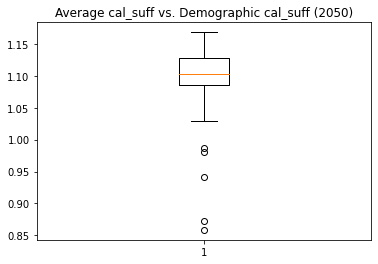

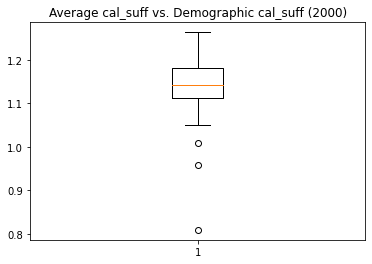

In [258]:
plt.figure()
plt.boxplot(l_2050)
plt.title('Average cal_suff vs. Demographic cal_suff (2050)')
plt.show()
plt.boxplot(l_2000)
plt.title('Average cal_suff vs. Demographic cal_suff (2000)')
plt.show()

In [319]:
cnts = [c for  c, d in diffs_2000 if d >1.2]
cnts

['AGO',
 'BDI',
 'BEN',
 'BFA',
 'CAF',
 'COD',
 'ETH',
 'GIN',
 'GMB',
 'GTM',
 'LSO',
 'MDG',
 'MLI',
 'MOZ',
 'MWI',
 'NAM',
 'NER',
 'RWA',
 'SEN',
 'SOM',
 'TCD',
 'UGA',
 'ZMB']

In [307]:
cnty_pops[(cnty_pops['Location']=='Angola') & (cnty_pops['Time']==2050)]['PopTotal']['Medium']

77420000

In [317]:
l = []
year = 2000
for cnt in cnts:
    try:
        print(cnt)
        new_name = countries_names[countries_names['ISO3']==country].name.values[0]
        cnt_pop = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==year)]['PopTotal']['Medium']
        l.append(\
        (get_pop(df_male, country=new_name, year=year, demographic='child') + get_pop(df_female,country=new_name, year=year, demographic='child')) / cnt_pop \
        )
    except:
        new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
        cnt_pop = cnty_pops[(cnty_pops['Location'] == new_name) & (cnty_pops['Time']==year)]['PopTotal']['Medium']
        l.append(\
        (get_pop(df_male, country=new_name, year=year, demographic='child') + get_pop(df_female,country=new_name, year=year, demographic='child')) / cnt_pop \
        )
        

np.mean(l)

AGO
BDI
BEN
BFA
CAF
COD
ETH
GIN
GMB
GTM
LSO
MDG
MLI
MOZ
MWI
NAM
NER
RWA
SEN
SOM
TCD
UGA
ZMB


0.13828802289369588

In [290]:
(get_pop(df_male, demographic='toddler') + get_pop(df_female, demographic='toddler')) / pop_medium

0.0708961057557683

In [111]:
ssp=2
df = pd.read_csv(data_path+'ssp'+str(ssp)+'_compare_new.csv')
waste = .19*1.
my_diet = diets[ssp-1] * 1.

pop_medium = cnty_pops[(cnty_pops['Location']=='World') & (cnty_pops['Time']==2050)]['PopTotal']['Medium']

df_dup = df.copy()
df_dup['cal_per_ha_pred'] = df_dup['cal_per_ha_2000'].apply(lambda x: x*1.25)
df_dup['calories_2050'] = df_dup['cal_per_ha_pred'] * df_dup['%cropland_2050'] * df_dup['ha_per_pixel']

diff = cal_suff(df_dup, diet=my_diet, population=pop_medium, food_waste=waste) \
    - cal_suff(df, diet=diets[ssp-1], population=pop_medium)
diff_demo = cal_suff_demo(df_dup, diet=my_diet, food_waste=waste) \
    - cal_suff_demo(df, diet=diets[ssp-1])

In [112]:
diff, diff_demo

(0.12455824331364829, 0.13996557566906254)